<a href="https://colab.research.google.com/github/deva237/Task3_Iris_Codsoft/blob/main/Codsoft_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 3 IRIS FLOWER CLASSIFICATION**

he Iris flower dataset consists of three species: setosa, versicolor,
 and virginica. These species can be distinguished based on their
 measurements. Now, imagine that you have the measurements
 of Iris flowers categorized by their respective species. Your
 objective is to train a machine learning model that can learn from
 these measurements and accurately classify the Iris flowers into
 their respective species.
 Use the Iris dataset to develop a model that can classify iris
 flowers into different species based on their sepal and petal
 measurements. This dataset is widely used for introductory
 classification tasks.

# **Step 1 Load the dataset**

In [ ]:
import pandas as pd
iris_df='iris.csv'
df=pd.read_csv(iris_df)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# **Step 2 Data exploration**


In [ ]:
missing_values=df.isnull().sum()
# missing_values
print('Missing values\n', missing_values)
data_description=df.describe(include='all')
# data_description
print('Data description\n', data_description)


Missing values
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
Data description
        sepal_length  sepal_width  petal_length  petal_width     species
count    150.000000   150.000000  1.500000e+02   150.000000  150.000000
mean       0.000000     3.054000  4.736952e-17     1.198667    1.000000
std        1.003350     0.433594  1.003350e+00     0.763161    0.819232
min       -1.870024     2.000000 -1.568735e+00     0.100000    0.000000
25%       -0.900681     2.800000 -1.227541e+00     0.300000    0.000000
50%       -0.052506     3.000000  3.362659e-01     1.300000    1.000000
75%        0.674501     3.300000  7.627586e-01     1.800000    2.000000
max        2.492019     4.400000  1.786341e+00     2.500000    2.000000


# **Step 3 Data Preprocessing**


In [ ]:
# Handling missing values
from sklearn.preprocessing import LabelEncoder, StandardScaler
df['sepal_length'].fillna(df['sepal_length'].median(), inplace=True)
df['petal_length'].fillna(df['petal_length'].median(), inplace=True)

# Encoding categorical variables
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

# Feature Scaling
scaler = StandardScaler()
df[['sepal_length', 'petal_length']] = scaler.fit_transform(df[['sepal_length', 'petal_length']])

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,3.5,-1.341272,0.2,0
1,-1.143017,3.0,-1.341272,0.2,0
2,-1.385353,3.2,-1.398138,0.2,0
3,-1.506521,3.1,-1.284407,0.2,0
4,-1.021849,3.6,-1.341272,0.2,0


# **Step 4 Feature selection**

In [ ]:

import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler #Import MinMaxScaler instead of StandardScaler

X = df.drop('species', axis=1)
y = df['species']

# Apply SelectKBest class to extract top 2 best features
bestfeatures = SelectKBest(score_func=chi2, k=2)

#Fit the scaler on the features before applying SelectKBest
scaler = MinMaxScaler() # Use MinMaxScaler to scale features to a range of 0 to 1
X_scaled = scaler.fit_transform(X)

# Use X_scaled in the fit method since it has been scaled to have non-negative values
fit = bestfeatures.fit(X_scaled, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  # naming the dataframe columns
print(featureScores.nlargest(2, 'Score'))  # print 2 best features

          Specs      Score
3   petal_width  30.568922
2  petal_length  26.827240


# **Step 5 Split the dataset**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Step 6 Build a model**

In [ ]:
# random classifier model

from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest Classifier model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
# Decision tree  classifier

from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


In [ ]:
# logistic regression

from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)


LogisticRegression()

# **Step 7 Model evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Set average='weighted' to calculate weighted average precision for multiclass
precision = precision_score(y_test, y_pred, average='weighted')

recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# **Step 8 Make predictions**

In [ ]:
# Assuming 'new_data' is a DataFrame with the same features as the training data
new_data = pd.DataFrame({
    'sepal_length': [5.1, 6.2, 7.3],
    'sepal_width': [3.5, 2.8, 2.9], # Added missing feature
    'petal_length': [1.4, 4.8, 6.3],
    'petal_width': [0.2, 1.8, 2.5]  # Added missing feature
})

# Scale the new data using the same scaler used for training data
new_data_scaled = scaler.transform(new_data)

# Make predictions on the new data
predictions = model.predict(new_data_scaled)

# Print the predicted species
print(predictions)

[0 2 2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# **Step 9 Visualizations**

**Histogram**

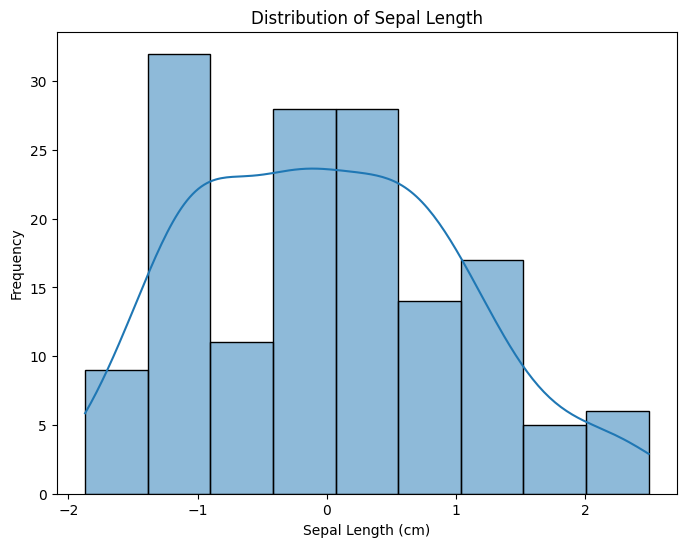

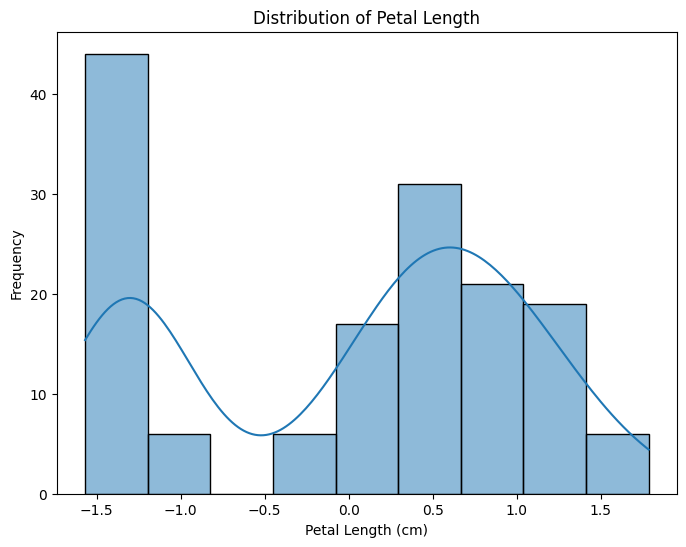

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for sepal length
plt.figure(figsize=(8, 6))
sns.histplot(df['sepal_length'], kde=True)
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

# Histogram for petal length
plt.figure(figsize=(8, 6))
sns.histplot(df['petal_length'], kde=True)
plt.title('Distribution of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.show()


**Scatterplot**

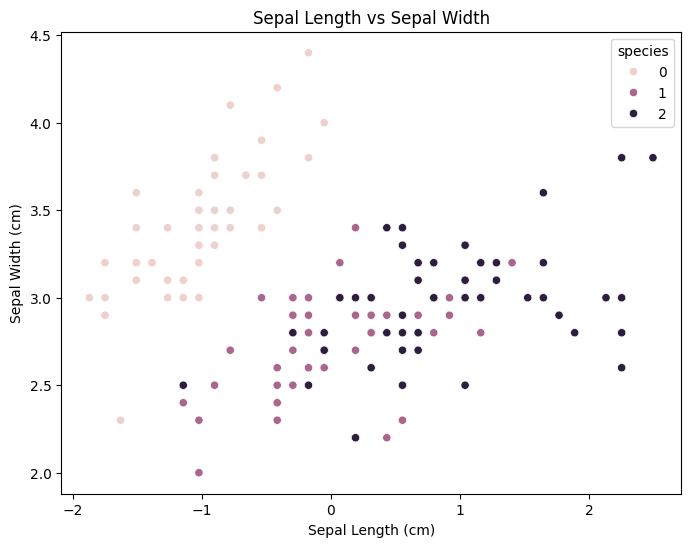

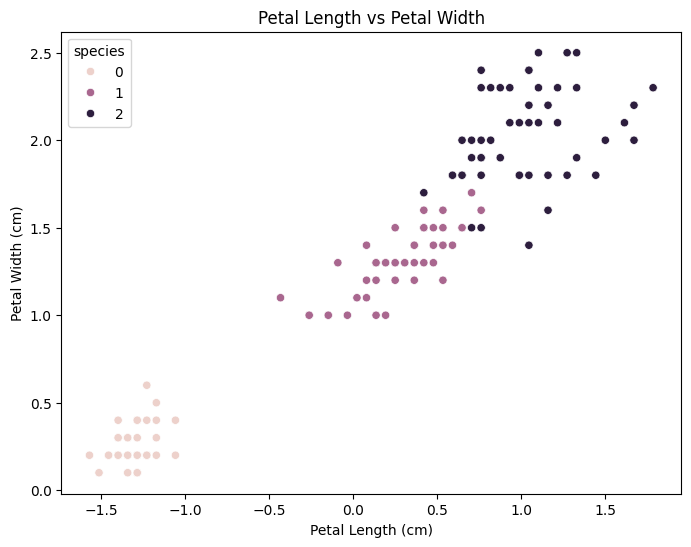

In [ ]:
import matplotlib.pyplot as plt
# Scatter plot for sepal length vs sepal width, colored by species
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df, color='red')
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

# Scatter plot for petal length vs petal width, colored by species
plt.figure(figsize=(8, 6))
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=df, color='blue')
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()


**Box plot**

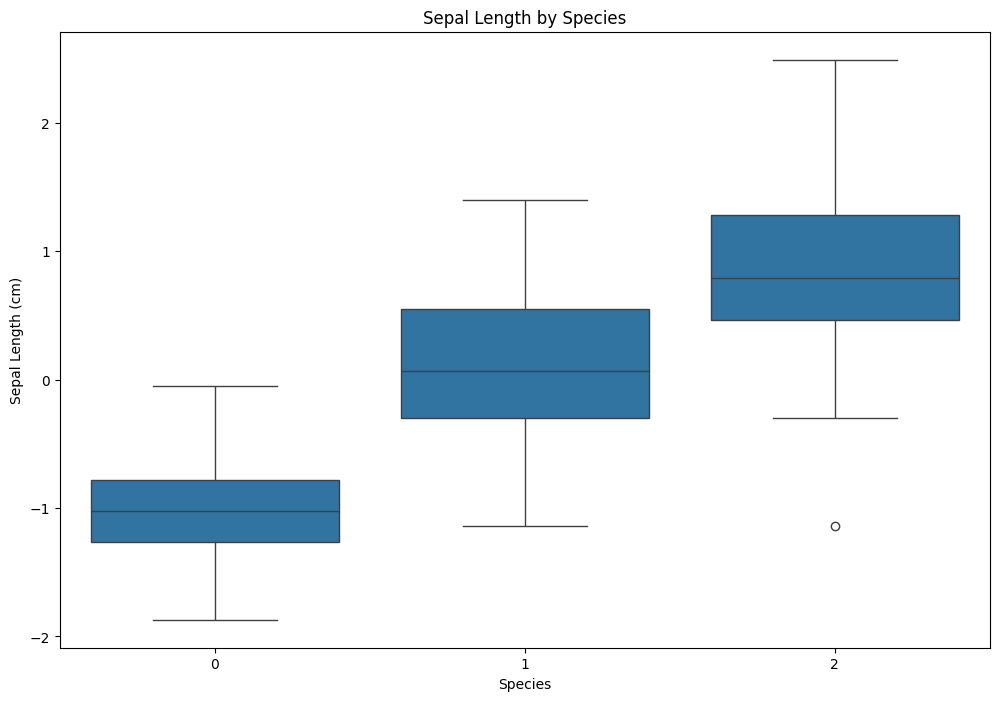

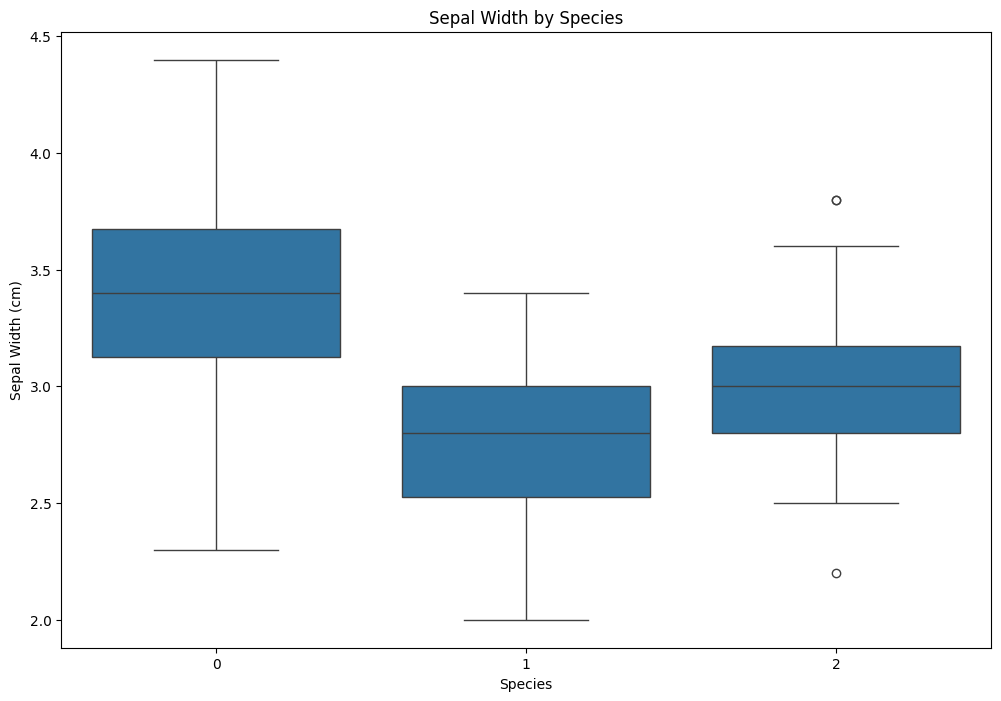

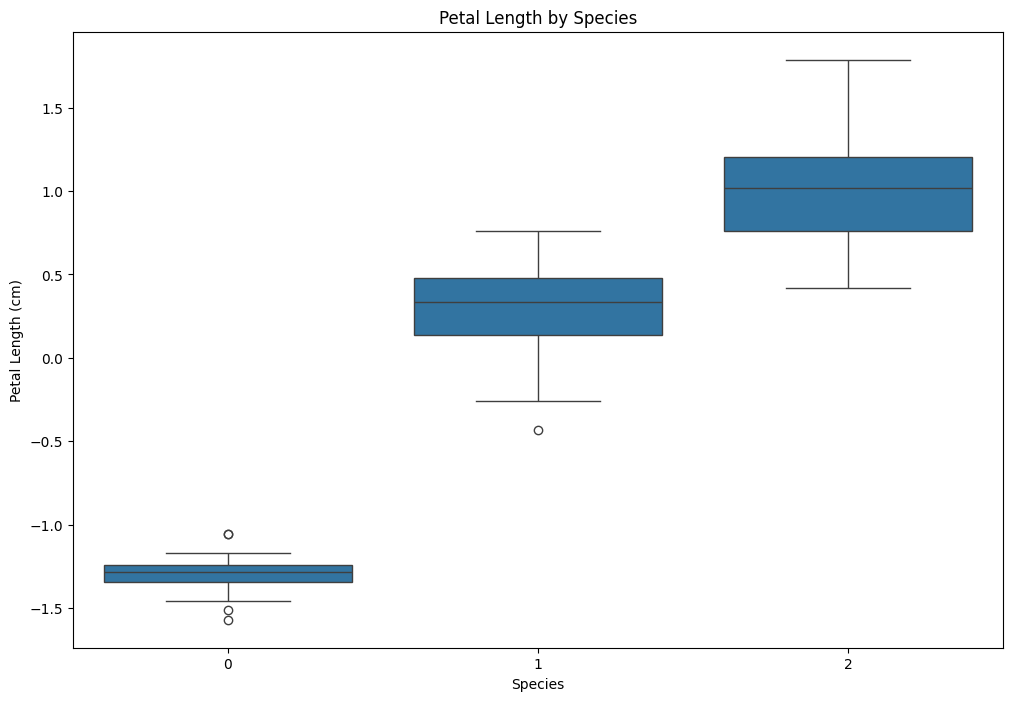

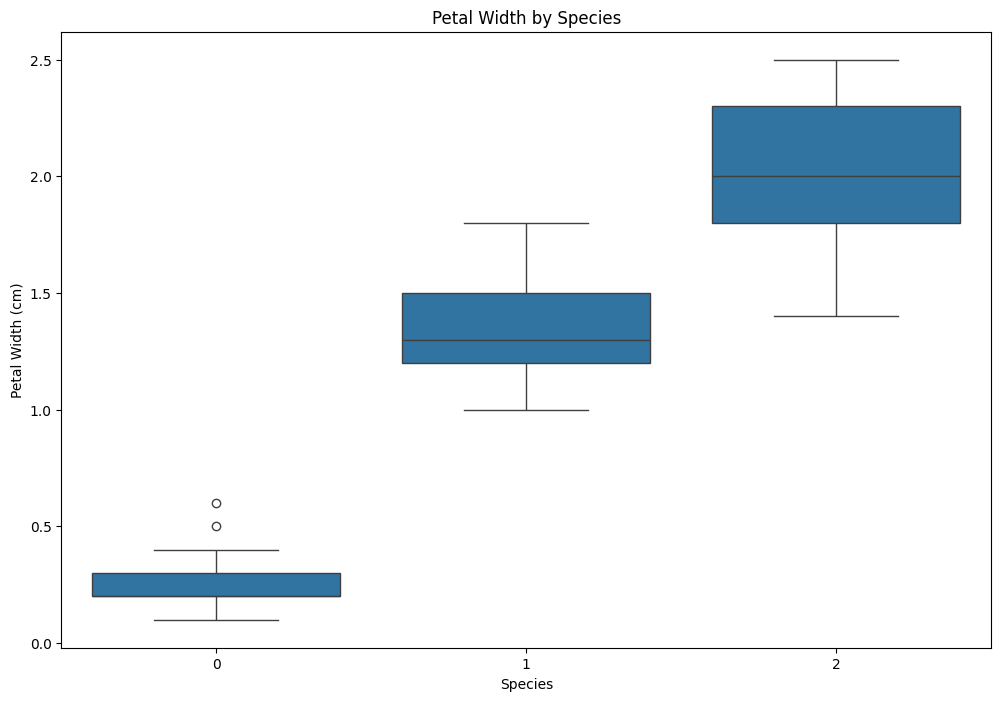

In [ ]:
import matplotlib.pyplot as plt
# Create a box plot for each feature grouped by species
plt.figure(figsize=(12, 8))
sns.boxplot(x='species', y='sepal_length', data=df)
plt.title('Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='species', y='sepal_width', data=df)
plt.title('Sepal Width by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Width (cm)')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='species', y='petal_length', data=df)
plt.title('Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='species', y='petal_width', data=df)
plt.title('Petal Width by Species')
plt.xlabel('Species')
plt.ylabel('Petal Width (cm)')
plt.show()


**Heatmap**

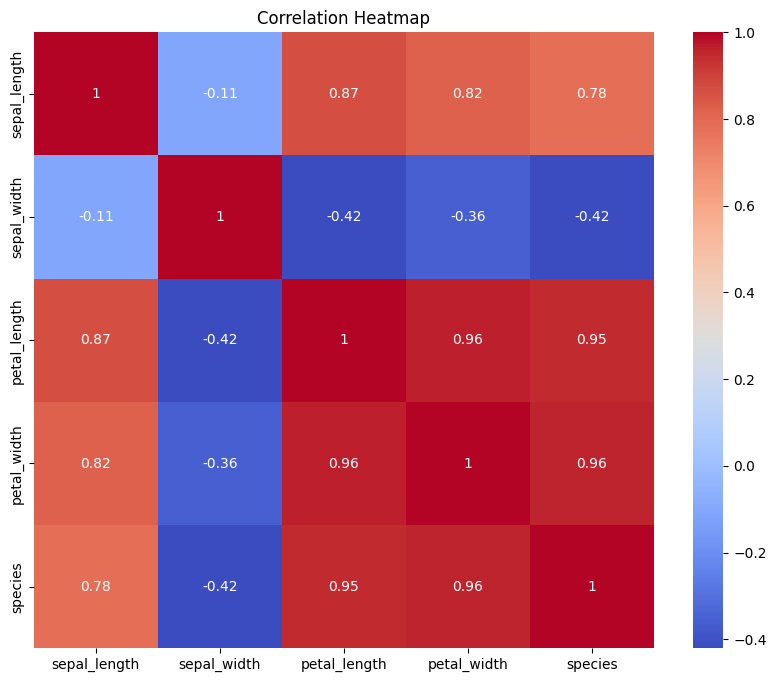

In [ ]:

import matplotlib.pyplot as plt
# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
